In [17]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"makkmak12","key":"ba881d87c5dab3c0547e8ba888bedfff"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d shreyapmaher/fruits-dataset-images


Dataset URL: https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images
License(s): other
100% 204M/205M [00:10<00:00, 24.8MB/s]
100% 205M/205M [00:10<00:00, 21.2MB/s]


In [5]:
!unzip fruits-dataset-images.zip -d fruits_dataset



Archive:  fruits-dataset-images.zip
  inflating: fruits_dataset/images/apple fruit/Image_1.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_10.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_11.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_12.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_13.png  
  inflating: fruits_dataset/images/apple fruit/Image_14.png  
  inflating: fruits_dataset/images/apple fruit/Image_15.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_16.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_17.jpeg  
  inflating: fruits_dataset/images/apple fruit/Image_18.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_19.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_2.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_20.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_21.jpg  
  inflating: fruits_dataset/images/apple fruit/Image_22.jpg  
  inflating: fruits_dataset/images/

In [6]:
!ls fruits-dataset-images

ls: cannot access 'fruits-dataset-images': No such file or directory


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
IMG_SIZE=224
BATCH_SIZE=32

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [11]:
train_generator=train_datagen.flow_from_directory(
    '/content/fruits_dataset/images',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 288 images belonging to 9 classes.


In [12]:
val_generator=train_datagen.flow_from_directory(
    '/content/fruits_dataset/images',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Changed from 'categorical' to 'sparse'
    subset='validation'
)

Found 71 images belonging to 9 classes.


In [13]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print(class_indices)

{'apple fruit': 0, 'banana fruit': 1, 'cherry fruit': 2, 'chickoo fruit': 3, 'grapes fruit': 4, 'kiwi fruit': 5, 'mango fruit': 6, 'orange fruit': 7, 'strawberry fruit': 8}


In [14]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(9,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train_generator,epochs=9,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.1187 - loss: 3.8404

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1176 - loss: 3.7793 - val_accuracy: 0.1831 - val_loss: 2.1573
Epoch 2/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1454 - loss: 2.1285 - val_accuracy: 0.2254 - val_loss: 1.9740
Epoch 3/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2431 - loss: 1.9845 - val_accuracy: 0.3944 - val_loss: 1.7240
Epoch 4/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4695 - loss: 1.5620 - val_accuracy: 0.4930 - val_loss: 1.5065
Epoch 5/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5593 - loss: 1.2962 - val_accuracy: 0.5070 - val_loss: 1.3385
Epoch 6/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 995ms/step - accuracy: 0.6621 - loss: 1.0262 - val_accuracy: 0.4930 - val_loss: 1.4159
Epoch 7/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7562 - loss: 0.6997 - val_accuracy: 0.5211 - val_loss: 1.8130
Epoch 8/9
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8135 - loss: 0.5731 - val_accuracy: 0.5211 - val_loss: 1.7913
Epoch 9/9
9/9 ━━━━━━━━━━

In [19]:
model.save('/content/fruits_dataset/images_model.h5')

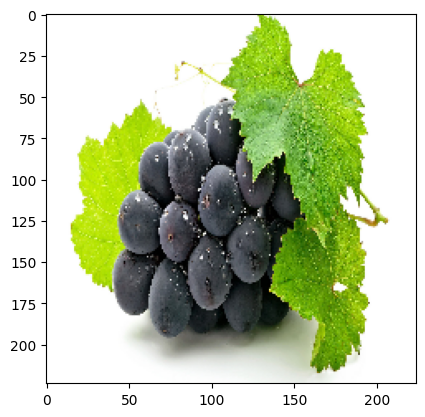

In [27]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

test_image_path="/content/fruits_dataset/images/grapes fruit/Image_1.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [28]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255


In [29]:
prediction=model.predict(img_array)
print(prediction)
ind=np.argmax(prediction)
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[2.8775871e-06 2.6343189e-06 2.8723630e-01 2.6008688e-04 7.1238673e-01
  8.3289058e-05 2.7726781e-05 1.9341767e-10 3.6498338e-07]]
grapes fruit
